### Resnet50V2

In [1]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

# Here Resnet50 model is implemented , please try with Resnet50V2 too.

from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# import pickle

# pickle_in = open("X_train.pickle","rb")
# X_train = pickle.load(pickle_in)

# pickle_in = open("y_train.pickle","rb")
# y_train = pickle.load(pickle_in)

# pickle_in = open("X_test.pickle","rb")
# X_test = pickle.load(pickle_in)

# pickle_in = open("y_test.pickle","rb")
# y_test = pickle.load(pickle_in)

In [3]:
# X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
        
train_path = './Datasets/Training/'

In [5]:
# Import the Resnet50 or Resnet50 V2 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

Rsnetv2 = ResNet50V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in Rsnetv2.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('./Datasets/Training/*')

In [8]:
len(folders)

2

In [9]:
# our layers - you can add more if you want
x = Flatten()(Rsnetv2.output)

In [32]:
prediction = Dense(2, activation='sigmoid')(x)

# create a model object
model = Model(inputs=Rsnetv2.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [33]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='Adam', #Adamax , RMSprop , Adagrad
  metrics=['accuracy','AUC','Precision','Recall'])
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 50

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('./Datasets/Training/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = validation_datagen.flow_from_directory('./Datasets/Test/',
                                                  target_size = (224, 224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical')

Found 39375 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


In [35]:
len(training_set),len(test_set)

(1231, 270)

In [15]:
training_set.class_indices

{'Fire': 0, 'No_Fire': 1}

In [16]:
imgs ,labels = next(training_set)

In [17]:
from matplotlib import pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

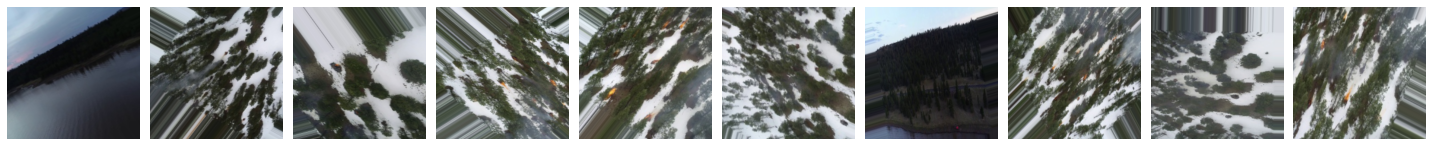

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [18]:
plotImages(imgs)
print(labels)

In [20]:
#Add checkpoints 
from keras.callbacks import ModelCheckpoint
#filepath='saved_models/models.h5'
filepath="./FirevsNonFire_Resnet50v2_RGB_transfer_learning_model_weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [36]:
history = model.fit(training_set,steps_per_epoch= 10 ,verbose=2,epochs=40)

Epoch 1/40
10/10 - 23s - loss: 0.9061 - accuracy: 0.8250 - auc: 0.8904 - precision: 0.8259 - recall: 0.8156
Epoch 2/40
10/10 - 26s - loss: 0.7261 - accuracy: 0.9250 - auc: 0.9471 - precision: 0.9024 - recall: 0.9250
Epoch 3/40
10/10 - 25s - loss: 0.6015 - accuracy: 0.9281 - auc: 0.9445 - precision: 0.9154 - recall: 0.9125
Epoch 4/40
10/10 - 28s - loss: 0.4370 - accuracy: 0.9250 - auc: 0.9554 - precision: 0.9214 - recall: 0.9156
Epoch 5/40
10/10 - 24s - loss: 0.4359 - accuracy: 0.9531 - auc: 0.9669 - precision: 0.9408 - recall: 0.9438
Epoch 6/40
10/10 - 25s - loss: 0.5602 - accuracy: 0.9375 - auc: 0.9548 - precision: 0.9167 - recall: 0.9281
Epoch 7/40
10/10 - 28s - loss: 0.4875 - accuracy: 0.9563 - auc: 0.9628 - precision: 0.9534 - recall: 0.9594
Epoch 8/40
10/10 - 23s - loss: 0.4234 - accuracy: 0.9469 - auc: 0.9708 - precision: 0.9464 - recall: 0.9375
Epoch 9/40
10/10 - 24s - loss: 0.2463 - accuracy: 0.9688 - auc: 0.9795 - precision: 0.9565 - recall: 0.9625
Epoch 10/40
10/10 - 24s - lo

KeyboardInterrupt: 

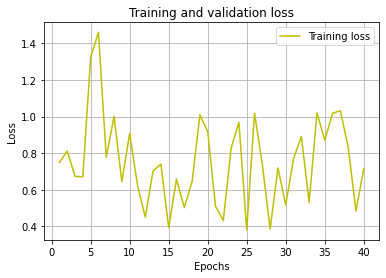

In [25]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

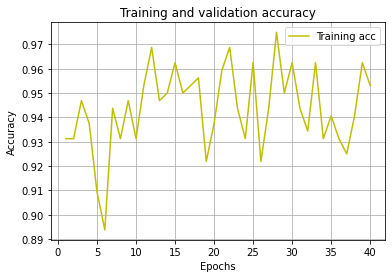

In [26]:
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [24]:
model.evaluate(test_set)

270/270 [==============================] - 725s 3s/step - loss: 4.9390 - accuracy: 0.6435 - auc: 0.6503 - precision: 0.6435 - recall: 0.6435


[4.939048767089844,
 0.6434954404830933,
 0.650293231010437,
 0.6434954404830933,
 0.6434954404830933]

In [27]:
prediction = model.predict(test_set).round(2)
prediction

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [0.39, 0.61],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]], dtype=float32)

<AxesSubplot:>

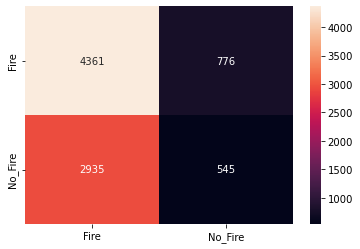

In [28]:
y_pred = [np.argmax(label) for label in prediction ]

classlabel = ['Fire','No_Fire']

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_set.classes, y_pred)
#print(cm)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=classlabel , yticklabels=classlabel)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(test_set.classes, y_pred,target_names=classlabel))

              precision    recall  f1-score   support

        Fire       0.60      0.85      0.70      5137
     No_Fire       0.41      0.16      0.23      3480

    accuracy                           0.57      8617
   macro avg       0.51      0.50      0.46      8617
weighted avg       0.52      0.57      0.51      8617



In [29]:
from tensorflow.keras.models import load_model

model.save('model1.h5')

-----------------------------------------------------------------------------------------

### InceptionV3

In [34]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf

from glob import glob

In [35]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of Inception
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [36]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [37]:
for layer in inception.layers[:140]:
    layer.trainable = False
for layer in inception.layers[140:]:
    layer.trainable = True

In [38]:
for i, layer in enumerate(inception.layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d_3 False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_4 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 Fal

In [39]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [41]:
prediction = Dense(1, activation='softmax')(x)

# create a model object
model2 = Model(inputs=inception.input, outputs=prediction)

In [42]:
# view the structure of the model
model2.compile(optimizer='RMSprop',  #Adamax , RMSprop , Adagrad, 
              loss='binary_crossentropy',
              metrics=['accuracy','AUC','Precision','Recall'])

print("model2 compiled")
print(model2.summary())

model2 compiled
Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________

In [43]:
#Add checkpoints 
from keras.callbacks import ModelCheckpoint
#filepath='saved_models/models.h5'
filepath="./FirevsNonFire_InceptionV3_RGB_transfer_learning_model_weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [45]:
history = model.fit(
    X_train,y_train,batch_size=32,validation_split=0.2, steps_per_epoch= 12,epochs=40, validation_steps= 30 ,
    callbacks=callbacks_list)

Epoch 1/40
12/12 [==============================] - ETA: 0s - loss: 117.9766 - accuracy: 0.8385 - auc_1: 0.8430 - precision_1: 0.7500 - recall_1: 0.8630
Epoch 00001: val_accuracy improved from -inf to 0.84062, saving model to .\FirevsNonFire_InceptionV3_RGB_transfer_learning_model_weights-improvement-01-0.84.hdf5
12/12 [==============================] - 357s 30s/step - loss: 117.9766 - accuracy: 0.8385 - auc_1: 0.8430 - precision_1: 0.7500 - recall_1: 0.8630 - val_loss: 120.3004 - val_accuracy: 0.8406 - val_auc_1: 0.7887 - val_precision_1: 0.9457 - val_recall_1: 0.5971
Epoch 2/40
12/12 [==============================] - ETA: 0s - loss: 70.0089 - accuracy: 0.9062 - auc_1: 0.8874 - precision_1: 0.9250 - recall_1: 0.8043
Epoch 00002: val_accuracy improved from 0.84062 to 0.86354, saving model to .\FirevsNonFire_InceptionV3_RGB_transfer_learning_model_weights-improvement-02-0.86.hdf5
12/12 [==============================] - 102s 8s/step - loss: 70.0089 - accuracy: 0.9062 - auc_1: 0.8874 - 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Lenovo\AppData\Local\Temp/ipykernel_8008/3794215363.py", line 1, in <module>
    history = model.fit(
  File "C:\Users\Lenovo\anaconda3\envs\myDL\lib\site-packages\tensorflow\python\keras\engine\training.py", line 108, in _method_wrapper
    return method(self, *args, **kwargs)
  File "C:\Users\Lenovo\anaconda3\envs\myDL\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1123, in fit
    val_logs = self.evaluate(
  File "C:\Users\Lenovo\anaconda3\envs\myDL\lib\site-packages\tensorflow\python\keras\engine\training.py", line 108, in _method_wrapper
    return method(self, *args, **kwargs)
  File "C:\Users\Lenovo\anaconda3\envs\myDL\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1379, in evaluate
    tmp_logs = test_funct

TypeError: object of type 'NoneType' has no len()

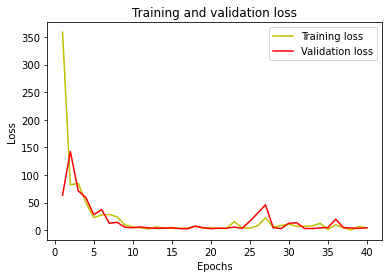

In [46]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

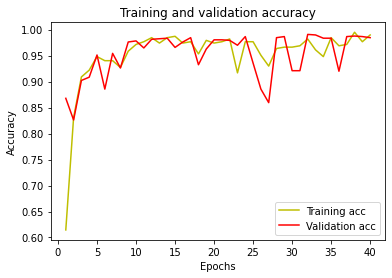

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
model2.evaluate(validation_set)

237/237 [==============================] - 1027s 4s/step - loss: 9.4199 - accuracy: 0.9349 - auc: 0.9397 - precision: 0.8993 - recall: 0.9250


[9.419882774353027,
 0.93489670753479,
 0.9397316575050354,
 0.8993228077888489,
 0.9250057935714722]

In [31]:
from tensorflow.keras.models import load_model

model2.save('model2.h5')

--------------------------------------------------------------------------------------------------------------------------

### VGG16

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf

from glob import glob

In [33]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of Inception
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [34]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [35]:
for i, layer in enumerate(vgg16.layers):
    print(i, layer.name, layer.trainable)

0 input_3 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [36]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [37]:
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model3 = Model(inputs=vgg16.input, outputs=prediction)

In [41]:
# view the structure of the model
model3.compile(optimizer='RMSprop',  #Adamax , RMSprop , Adagrad, 
              loss='binary_crossentropy',
              metrics=['accuracy','AUC','Precision','Recall'])

print("model3 compiled")
print(model3.summary())

model3 compiled
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56

In [42]:
#Add checkpoints 
from keras.callbacks import ModelCheckpoint
#filepath='saved_models/models.h5'
filepath="./FirevsNonFire_VGG16_RGB_transfer_learning_model_weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [43]:
history = model3.fit(training_set,
          steps_per_epoch= 50 ,
          epochs=5, 
          validation_data=test_set,
          validation_steps= 50 ,
          callbacks=callbacks_list)

Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 0.2450 - accuracy: 0.9208 - auc: 0.9555 - precision: 0.9158 - recall: 0.8665 
Epoch 00001: val_accuracy improved from -inf to 0.71520, saving model to .\FirevsNonFire_VGG16_RGB_transfer_learning_model_weights-improvement-01-0.72.hdf5
50/50 [==============================] - 1198s 24s/step - loss: 0.2450 - accuracy: 0.9208 - auc: 0.9555 - precision: 0.9158 - recall: 0.8665 - val_loss: 0.6317 - val_accuracy: 0.7152 - val_auc: 0.7860 - val_precision: 0.7393 - val_recall: 0.4471
Epoch 2/5
50/50 [==============================] - ETA: 0s - loss: 0.2054 - accuracy: 0.9332 - auc: 0.9668 - precision: 0.9307 - recall: 0.8828 
Epoch 00002: val_accuracy did not improve from 0.71520
50/50 [==============================] - 1188s 24s/step - loss: 0.2054 - accuracy: 0.9332 - auc: 0.9668 - precision: 0.9307 - recall: 0.8828 - val_loss: 1.2099 - val_accuracy: 0.5916 - val_auc: 0.7967 - val_precision: 0.4907 - val_recall: 0.0520
Epoch 3

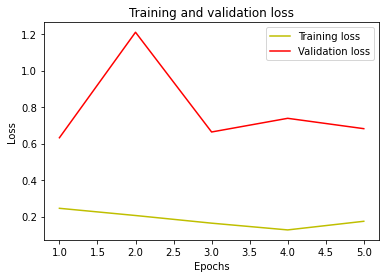

In [44]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

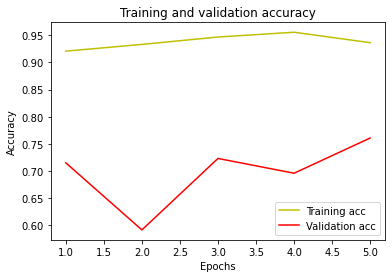

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model3.evaluate(validation_set)

In [47]:
from tensorflow.keras.models import load_model

model3.save('model3.h5')

-----------------------------------------------------------------------------------------------------------------------------

### Ensemble

In [16]:
test_set.reset()

In [36]:
model1.evaluate(test_set) # Resnet50v2

173/173 [==============================] - 731s 4s/step - loss: 2.0831 - accuracy: 0.7276 - auc: 0.7320 - precision: 0.7811 - recall: 0.4523


[2.083116054534912,
 0.7276314496994019,
 0.7319959998130798,
 0.781141459941864,
 0.4522988498210907]

In [37]:
model2.evaluate(test_set) #InceprionV3

173/173 [==============================] - 504s 3s/step - loss: 198.0567 - accuracy: 0.7525 - auc_1: 0.7152 - precision_1: 0.8117 - recall_1: 0.5040


[198.05670166015625,
 0.752466082572937,
 0.7152155637741089,
 0.8116612434387207,
 0.504023015499115]

In [38]:
model3.evaluate(test_set) # VGG16

173/173 [==============================] - 2207s 13s/step - loss: 0.6678 - accuracy: 0.7700 - auc_2: 0.7641 - precision_2: 0.7186 - recall_2: 0.7075


[0.6678368449211121,
 0.769989550113678,
 0.7640932202339172,
 0.7186223268508911,
 0.7074712514877319]

In [105]:
#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes

from keras.models import load_model
from sklearn.metrics import accuracy_score

# model1 = load_model('FirevsNonFire_Resnet50v2_RGB_transfer_learning_model_weights-improvement-03-0.73.hdf5')
model1 = load_model('model2.h5')
model2 = load_model('model3.h5')

models = [model1, model2]

preds = [(model.predict(test_set) > 0.5).astype("int32") for model in models]
preds

[array([[0],
        [0],
        [1],
        ...,
        [1],
        [0],
        [0]]),
 array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [1]])]

In [133]:
preds[0]
# pred = np.array(preds)
# pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [134]:
summed = np.sum(preds[0], axis=0)
summed

array([2161])

In [137]:
preds[0]

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [135]:
# argmax across classes
ensemble_prediction = np.argmax(preds[0], axis=1)

In [136]:
ensemble_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
test_set.classes

array([0, 0, 0, ..., 1, 1, 1])

In [145]:
ensemble_accuracy = accuracy_score(test_set.classes, y_pred)

print('Accuracy Score for average ensemble = ', ensemble_accuracy)


Accuracy Score for average ensemble =  0.5961471509806197


In [64]:
test_set.classes

array([0, 0, 0, ..., 1, 1, 1])

In [144]:

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(pred, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(test_set.classes, wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[0], " obained with w1=", max_acc_row[1],
      " w2=", max_acc_row[2], " and w3=", max_acc_row[3])  

ValueError: shape-mismatch for sum